### Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [2]:
# read csv
pakistan_df = pd.read_csv('pakistan_food_price.csv')

DATA DICTIONARY
data was collected over 15 years (2004-2019)

In [3]:
pakistan_df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
0,1/15/2004,Wheat flour - Retail,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5
1,2/15/2004,Wheat flour - Retail,KG,cereals and tubers,13.00,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5
2,3/15/2004,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5
3,4/15/2004,Wheat flour - Retail,KG,cereals and tubers,12.50,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5
4,5/15/2004,Wheat flour - Retail,KG,cereals and tubers,13.25,PKR,Pakistan,Balochistan,2272,Quetta,295,58,15,5,1,295_58_15_5


In [4]:
pakistan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      7662 non-null   object 
 1   cmname    7662 non-null   object 
 2   unit      7662 non-null   object 
 3   category  7662 non-null   object 
 4   price     7662 non-null   float64
 5   currency  7662 non-null   object 
 6   country   7662 non-null   object 
 7   admname   7662 non-null   object 
 8   adm1id    7662 non-null   int64  
 9   mktname   7662 non-null   object 
 10  mktid     7662 non-null   int64  
 11  cmid      7662 non-null   int64  
 12  ptid      7662 non-null   int64  
 13  umid      7662 non-null   int64  
 14  catid     7662 non-null   int64  
 15  sn        7662 non-null   object 
dtypes: float64(1), int64(6), object(9)
memory usage: 957.9+ KB


In [5]:
# check the wrong data types
pakistan_df['date'] = pd.to_datetime(pakistan_df['date'])

In [6]:
pakistan_df.dtypes

date        datetime64[ns]
cmname              object
unit                object
category            object
price              float64
currency            object
country             object
admname             object
adm1id               int64
mktname             object
mktid                int64
cmid                 int64
ptid                 int64
umid                 int64
catid                int64
sn                  object
dtype: object

In [7]:
pakistan_df.describe()

,date,price,adm1id,mktid,cmid,ptid,umid,catid
count,7662,7662.000000,7662.000000,7662.000000,7662.000000,7662.0,7662.000000,7662.000000
mean,2014-12-01 13:17:03.335943680,106.919688,2275.241321,292.975333,140.657270,15.0,9.745236,3.488906
min,2004-01-15 00:00:00,9.000000,2272.000000,291.000000,58.000000,15.0,5.000000,1.000000
25%,2013-03-15 00:00:00,36.922500,2275.000000,292.000000,61.000000,15.0,5.000000,1.000000
50%,2015-12-15 00:00:00,72.730000,2276.000000,293.000000,97.000000,15.0,5.000000,2.000000
75%,2017-11-15 00:00:00,138.397500,2276.000000,294.000000,138.000000,15.0,5.000000,6.000000
max,2019-10-15 00:00:00,997.000000,2277.000000,295.000000,465.000000,15.0,51.000000,8.000000
std,NaN,124.318398,1.692555,1.404504,107.135975,0.0,10.767328,2.724781


In [8]:
# remove irrelevant columns 
new_df = pakistan_df.drop(columns=['currency', 'country',
       'admname', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid',
       'catid', 'sn'])

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      7662 non-null   datetime64[ns]
 1   cmname    7662 non-null   object        
 2   unit      7662 non-null   object        
 3   category  7662 non-null   object        
 4   price     7662 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 299.4+ KB


In [10]:
new_df.head()

,date,cmname,unit,category,price
0,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.00
1,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.00
2,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25
3,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.50
4,2004-05-15,Wheat flour - Retail,KG,cereals and tubers,13.25


In [11]:
# CLEAN COMMODITY NAME COLUMN 
new_df['cmname'].nunique()

17

In [12]:
new_df['cmname'].unique()
# there are observations that do not represent food

array(['Wheat flour - Retail', 'Rice (coarse) - Retail',
       'Lentils (masur) - Retail', 'Milk - Retail',
       'Oil (cooking) - Retail', 'Wheat - Retail', 'Eggs - Retail',
       'Sugar - Retail', 'Ghee (artificial) - Retail',
       'Rice (basmati, broken) - Retail', 'Poultry - Retail',
       'Salt - Retail', 'Fuel (diesel) - Retail',
       'Fuel (petrol-gasoline) - Retail', 'Lentils (moong) - Retail',
       'Beans(mash) - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail'],
      dtype=object)

In [13]:
# remove observations that are not food

odd = ['Fuel (diesel) - Retail', 'Wage (non-qualified labour, non-agricultural) - Retail','Fuel (petrol-gasoline) - Retail']


new_df = new_df [ ~new_df['cmname'].isin(odd) ]


In [14]:
new_df['cmname'].value_counts()

cmname
Wheat flour - Retail               950
Rice (basmati, broken) - Retail    950
Rice (coarse) - Retail             830
Wheat - Retail                     727
Oil (cooking) - Retail             392
Sugar - Retail                     392
Poultry - Retail                   392
Ghee (artificial) - Retail         390
Beans(mash) - Retail               325
Lentils (masur) - Retail           313
Eggs - Retail                      298
Lentils (moong) - Retail           275
Milk - Retail                      265
Salt - Retail                      205
Name: count, dtype: int64

In [15]:
new_df['cmname'] = new_df['cmname'].str.split(' ', expand= True)[0].str.split('(', expand=True)[0]

In [16]:
new_df.head()

,date,cmname,unit,category,price
0,2004-01-15,Wheat,KG,cereals and tubers,13.00
1,2004-02-15,Wheat,KG,cereals and tubers,13.00
2,2004-03-15,Wheat,KG,cereals and tubers,14.25
3,2004-04-15,Wheat,KG,cereals and tubers,12.50
4,2004-05-15,Wheat,KG,cereals and tubers,13.25


In [17]:
new_df['cmname'].unique()

array(['Wheat', 'Rice', 'Lentils', 'Milk', 'Oil', 'Eggs', 'Sugar', 'Ghee',
       'Poultry', 'Salt', 'Beans'], dtype=object)

In [18]:
# UNIT COLUMN
new_df['unit'].unique()

array(['KG', 'L', 'Dozen'], dtype=object)

In [19]:
# we encode the unit as we cannot accurately tell the measurement

In [20]:
# CATEGORY
new_df['category'].unique()

array(['cereals and tubers', 'pulses and nuts', 'milk and dairy',
       'oil and fats', 'meat, fish and eggs', 'miscellaneous food'],
      dtype=object)

In [21]:
# DATE
new_df['day'] = new_df['date'].dt.day
new_df['month'] = new_df['date'].dt.month
new_df['year'] = new_df['date'].dt.year

In [22]:
new_df.head()

,date,cmname,unit,category,price,day,month,year
0,2004-01-15,Wheat,KG,cereals and tubers,13.00,15,1,2004
1,2004-02-15,Wheat,KG,cereals and tubers,13.00,15,2,2004
2,2004-03-15,Wheat,KG,cereals and tubers,14.25,15,3,2004
3,2004-04-15,Wheat,KG,cereals and tubers,12.50,15,4,2004
4,2004-05-15,Wheat,KG,cereals and tubers,13.25,15,5,2004


In [23]:
# drop the date columnn
new_df.drop(columns=['date'], inplace = True)

In [24]:
new_df.head()

,cmname,unit,category,price,day,month,year
0,Wheat,KG,cereals and tubers,13.00,15,1,2004
1,Wheat,KG,cereals and tubers,13.00,15,2,2004
2,Wheat,KG,cereals and tubers,14.25,15,3,2004
3,Wheat,KG,cereals and tubers,12.50,15,4,2004
4,Wheat,KG,cereals and tubers,13.25,15,5,2004


# EDA

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 0 to 7599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cmname    6704 non-null   object 
 1   unit      6704 non-null   object 
 2   category  6704 non-null   object 
 3   price     6704 non-null   float64
 4   day       6704 non-null   int32  
 5   month     6704 non-null   int32  
 6   year      6704 non-null   int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 340.4+ KB


In [26]:
# the index does not tally because we removed observations that are not food in cell 13
new_df.reset_index(drop=True, inplace= True)

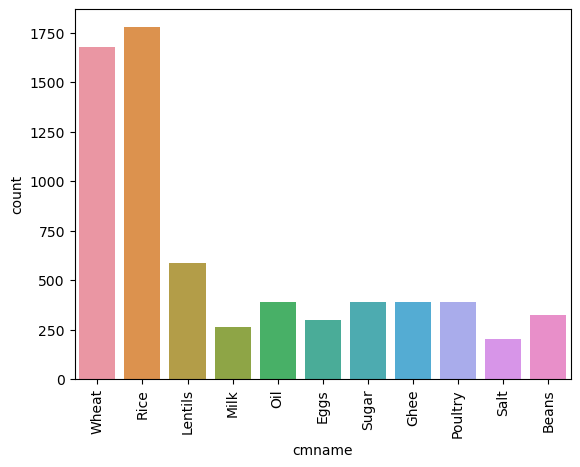

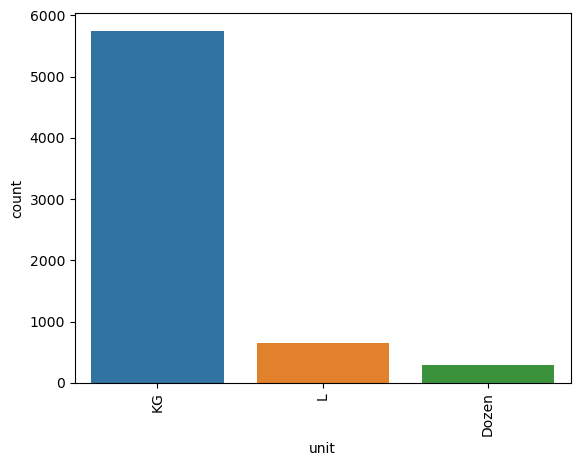

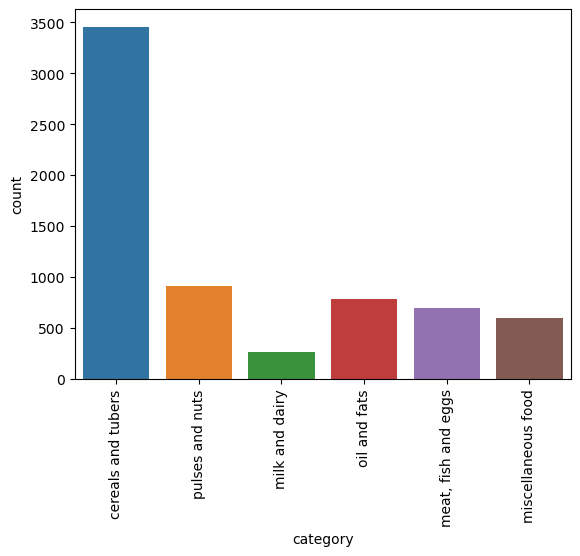

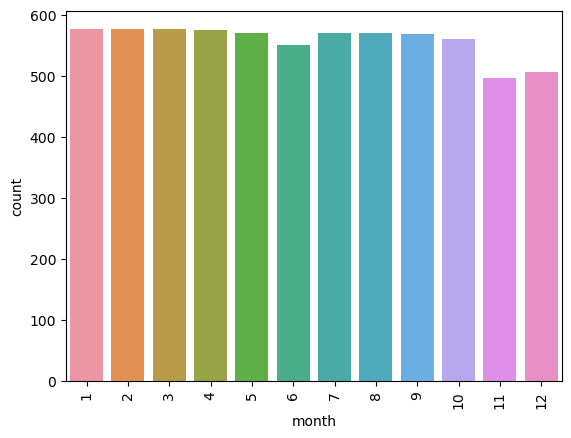

In [27]:
cat_col = ['cmname', 'unit', 'category', 'month']
for col in cat_col:
    plt.figure()
    sns.countplot(x = col, data = new_df)
    plt.xticks(rotation= 90)

In [28]:
# DISTRIBUTION OF NUMERICAL FEATURES
new_df['price'].describe()

count    6704.000000
mean       84.793985
std        64.087915
min         9.000000
25%        34.753000
50%        59.075000
75%       133.930000
max       301.430000
Name: price, dtype: float64

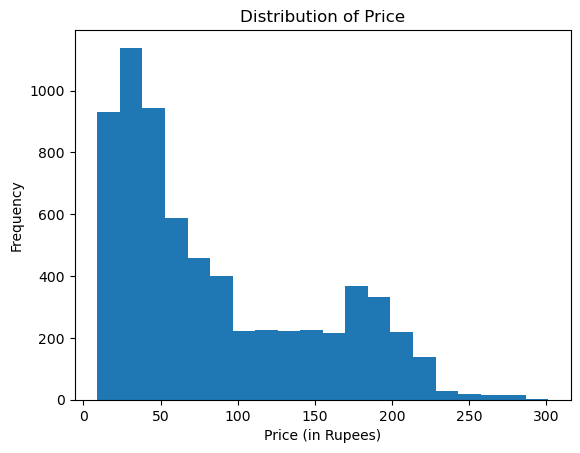

In [29]:
new_df['price'].plot(kind='hist', bins=20)
plt.xlabel ('Price (in Rupees)')
plt.title('Distribution of Price');


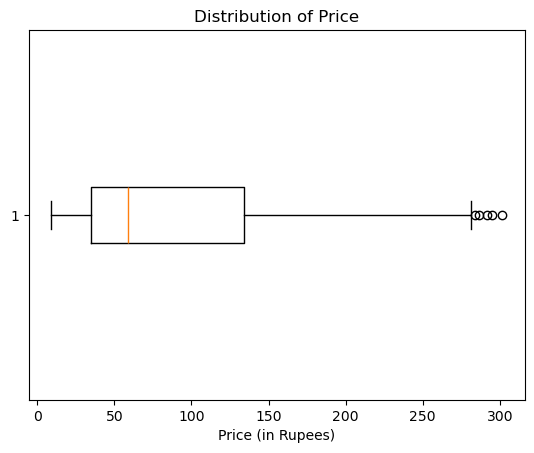

In [30]:
plt.boxplot(new_df['price'], vert = False);
plt.xlabel ('Price (in Rupees)')
plt.title('Distribution of Price');

In [31]:
# WHAT FACTORS CONTRIBUTE TO PRICE OF FOOD
# firstly check if there is large difference in price of food

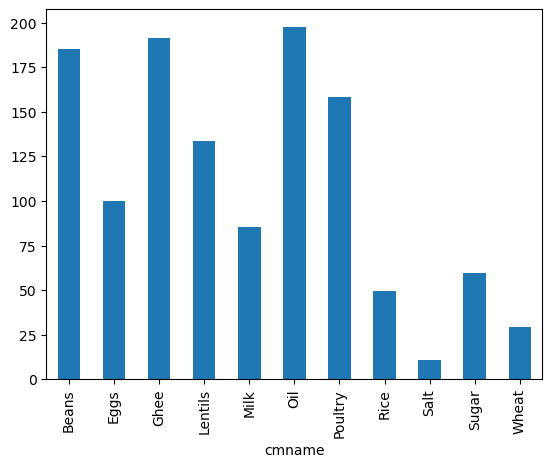

In [32]:
new_df.groupby('cmname')['price'].mean().plot(kind='bar');

In [33]:
# there is variation in price of food as expected

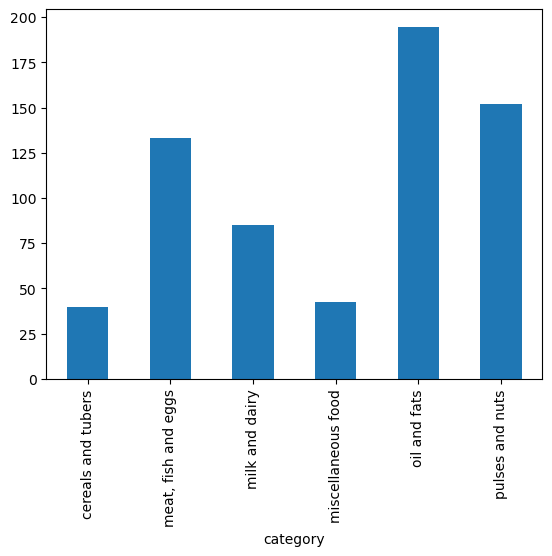

In [34]:
new_df.groupby('category')['price'].mean().plot(kind='bar');

In [35]:
# Does a particular time of the year affect food price?

<Axes: xlabel='month'>

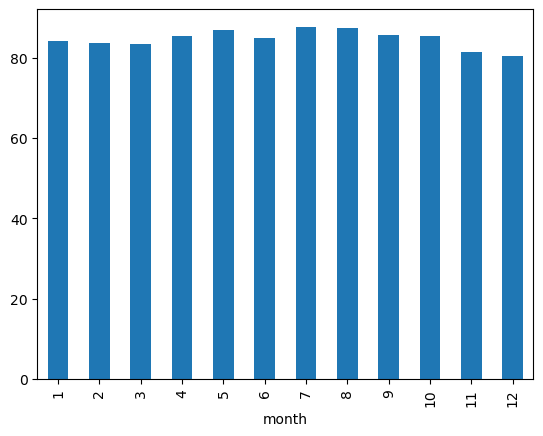

In [36]:
new_df.groupby(['month'])['price'].mean().plot(kind='bar')

In [37]:
# little difference in price between months

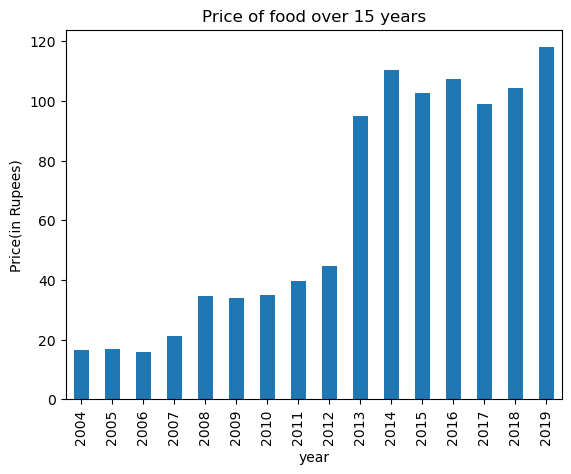

In [38]:
# let us check for year column
new_df.groupby(['year'])['price'].mean().plot(kind='bar')
plt.xlabel ('year')
plt.ylabel ('Price(in Rupees)')
plt.title('Price of food over 15 years');

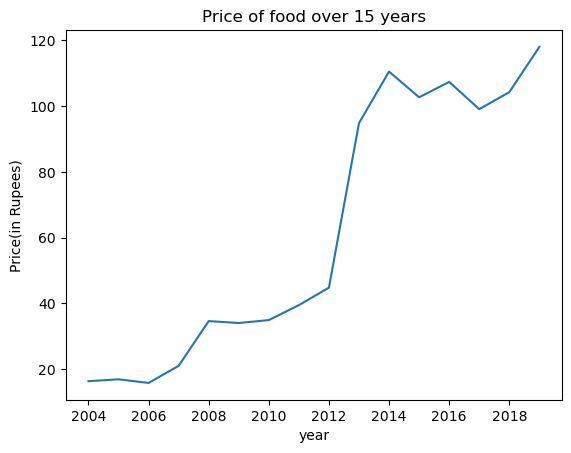

In [39]:
new_df.groupby(['year'])['price'].mean().plot()
plt.xlabel ('year')
plt.ylabel ('Price(in Rupees)')
plt.title('Price of food over 15 years');

In [40]:
# there is an upward trend which could be due to many reasons inflation, changes in demand and supply etc

In [41]:
new_df.columns

Index(['cmname', 'unit', 'category', 'price', 'day', 'month', 'year'], dtype='object')

In [42]:
X = new_df.drop(columns=['price'])
y = new_df['price'].values

# Data Preprocessing

In [43]:
# encode columns that are not numeric
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder = OneHotEncoder()
columns_to_encode = ['cmname', 'unit', 'category']
encoded_data = encoder.fit_transform(new_df[columns_to_encode]).toarray()

In [45]:
encoded_col = encoder.get_feature_names_out(columns_to_encode)
encoded_df = pd.DataFrame(encoded_data, columns = encoded_col)

In [46]:
final_df = pd.concat([new_df, encoded_df], axis =1)

In [47]:
final_df.drop(columns = ['cmname','unit', 'category'], axis =1, inplace =True)

In [48]:
# SPLIT DATA INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(final_df, y , test_size = .25, random_state = 8)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5028, 24)
(5028,)
(1676, 24)
(1676,)


# Model Selection

In [49]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV

In [50]:
models = {
    'Ridge Regression': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    # 'Logistic Regression': LogisticRegression(),
}

In [51]:
result = []  #store the mean accuracy of the models

for model in models.values():
    kf = KFold(n_splits = 10, random_state = 43, shuffle = True)
    cv_result = cross_val_score(model, X_train, y_train, cv=kf)
    result.append(cv_result.mean())
    # print(cv_result.mean())

print('accuracy of models are ;', result)

accuracy of models are ; [0.9999999999999616, 0.9999916806880169]


In [ ]:
# Ridge model performs better than Decision Tree

# Hyperparameter Tuning

In [54]:
kf = KFold(n_splits = 10, random_state = 20, shuffle = True)
param_grid = {'alpha': np.arange(0.001, 1, 10), 'solver': ['sag','lsqr']}

ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter= 2)
ridge_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=True),
                   estimator=Ridge(), n_iter=2,
                   param_distributions={'alpha': array([0.001]),
                                        'solver': ['sag', 'lsqr']})

In [55]:
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.001} 0.9999999952682346


In [57]:
test_score = ridge_cv.score(X_test,y_test)
test_score

0.9999999955943879